
# Linear Regression – Ocean Temperature Prediction (CalCOFI Dataset)

**Name:** Satheesh B  
**Roll No:** 24BAD107



## Step 1: Import Required Libraries

In [32]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import kagglehub


## Step 2: Download Dataset from Kaggle using kagglehub

In [33]:

path = kagglehub.dataset_download("sohier/calcofi")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'calcofi' dataset.
Path to dataset files: /kaggle/input/calcofi



## Step 3: Load Required CSV File


In [34]:

df = pd.read_csv(f"{path}/bottle.csv")

df.head()


/tmp/ipython-input-2277463839.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{path}/bottle.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 4: Select Features and Target Variable

In [35]:
possible_features = ['Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat']
features = [col for col in possible_features if col in df.columns]

target = 'T_degC'
df = df[features + [target]]


## Step 5: Handle Missing Values

In [36]:

df.isnull().sum()


,0
Depthm,0
Salnty,47354
O2ml_L,168662
STheta,52689
O2Sat,203589
T_degC,10963


In [37]:

# Mean imputation for missing values
df.fillna(df.mean(), inplace=True)


## Step 6: Feature Scaling

In [38]:

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 7: Train-Test Split

In [39]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## Step 8: Train Linear Regression Model

In [40]:

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


## Step 9: Model Evaluation

In [41]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 2.826964645804315
Root Mean Squared Error (RMSE): 1.6813579766975013
R² Score: 0.8406358970169368


## Step 10: Visualization

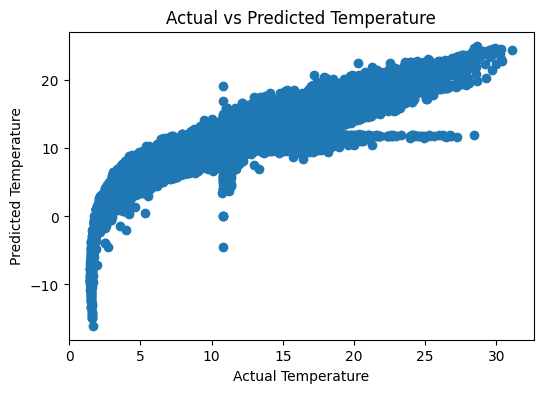

In [42]:

# Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()


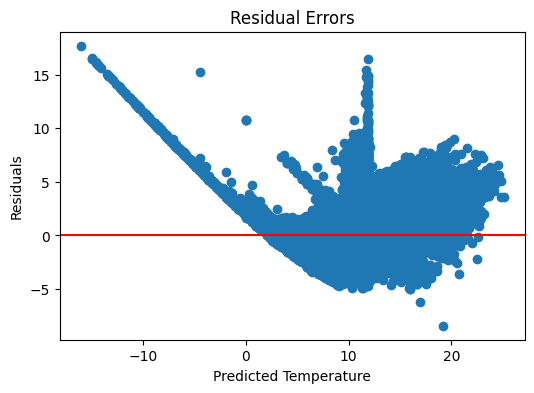

In [43]:

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Temperature")
plt.ylabel("Residuals")
plt.title("Residual Errors")
plt.show()


## Step 11: Model Optimization using Regularization

In [44]:

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

print("Ridge Regression R² Score:", ridge.score(X_test, y_test))
print("Lasso Regression R² Score:", lasso.score(X_test, y_test))


Ridge Regression R² Score: 0.840635994025459
Lasso Regression R² Score: 0.8401675496877703
